<a href="https://colab.research.google.com/github/dli-invest/dli-invest.github.io/blob/master/ibook/notebooks/references/BBTalib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple talib


[Ta lib in cloab](https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab)



In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
!pip install yfinance

(Reading database ... 144605 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



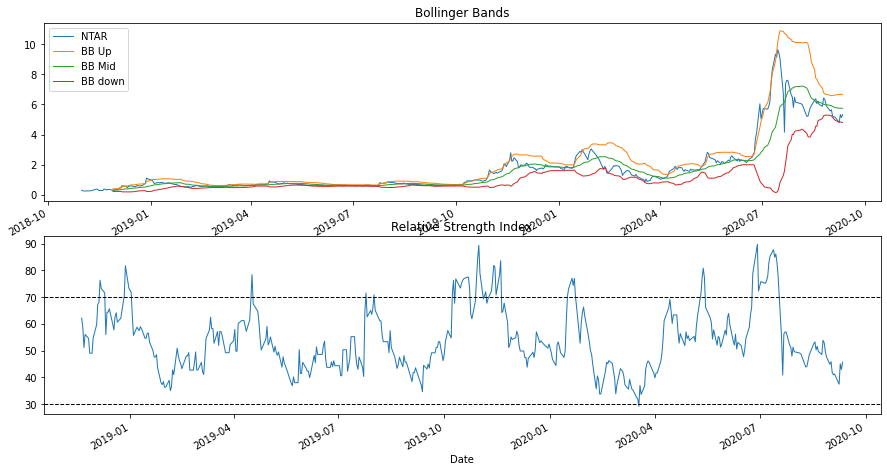

In [ ]:
import yfinance as yf
from talib import RSI, BBANDS
import matplotlib.pyplot as plt

msft = yf.Ticker('NTAR.CN')
msft_data = msft.history(period="max")
up, mid, low = BBANDS(msft_data.Close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)
rsi = RSI(msft_data.Close, timeperiod=14)
data = pd.DataFrame({'NTAR': msft_data.Close, 'BB Up': up, 'BB Mid': mid,
'BB down': low, 'RSI': rsi})
fg, axes= plt.subplots(nrows=2, figsize=(15,8))
data.drop('RSI', axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')

One of my best sales was selling NTAR at 3.00 back in november

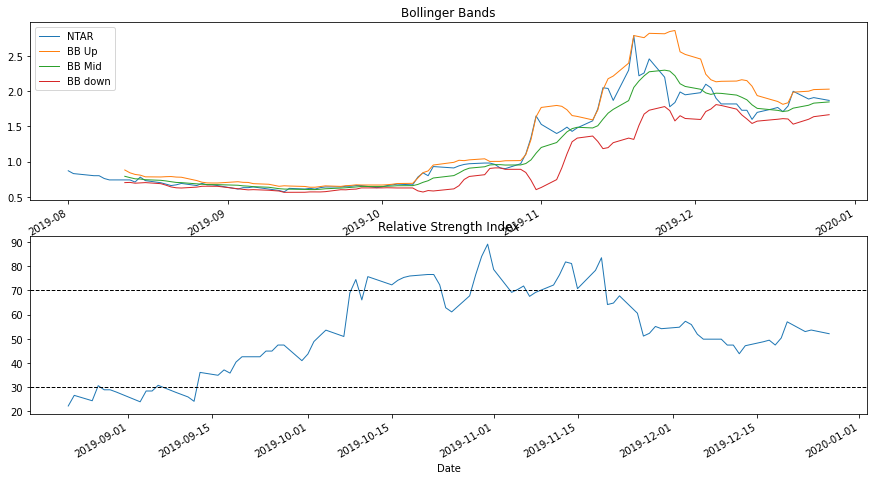

In [ ]:
import yfinance as yf
from talib import RSI, BBANDS
import matplotlib.pyplot as plt

ntar = yf.Ticker('NTAR.CN')
ntar_data = ntar.history(start='2019-08-01', end='2019-12-30')
up, mid, low = BBANDS(ntar_data.Close, timeperiod=7, nbdevup=2, nbdevdn=2, matype=0)
rsi = RSI(ntar_data.Close, timeperiod=14)
data = pd.DataFrame({'NTAR': ntar_data.Close, 'BB Up': up, 'BB Mid': mid,
'BB down': low, 'RSI': rsi})
fg, axes= plt.subplots(nrows=2, figsize=(15,8))
data.drop('RSI', axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')

In [ ]:
!pip install PyWavelets

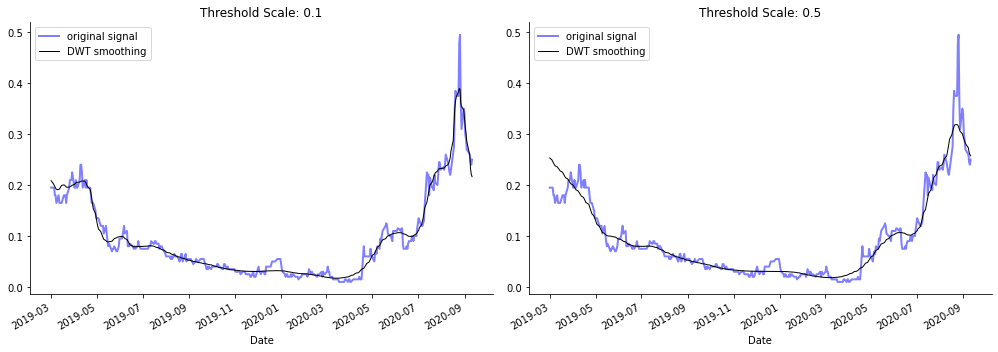

In [ ]:
import pywt

ntar = yf.Ticker('IDK.CN')
data = ntar.history(start='2019-03-01', end='2020-09-12')
signal = data.Close
wavelet = "db6"
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
for i, scale in enumerate([.1, .5]):
    
    coefficients = pywt.wavedec(signal, wavelet, mode='per')
    coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
    reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
    signal.plot(color="b", alpha=0.5, label='original signal', lw=2, 
                 title=f'Threshold Scale: {scale:.1f}', ax=axes[i])
    if len(reconstructed_signal) != len(signal.index):
      reconstructed_signal=reconstructed_signal[:len(signal.index)]
    pd.Series(reconstructed_signal, index=signal.index).plot(c='k', label='DWT smoothing', linewidth=1, ax=axes[i])
    axes[i].legend()
fig.tight_layout()
sns.despine();